#### MACHINE LEARNING
Classification: Twitter sentiment % scores were used to classify tweets into positive, negative and neutral sentiment. 

Algorithms used for analysis:
- Random Forest Classifier
- Regression


- Using the Same dataset Divide into Training and Testing
- Get the Predicted Stock Prices

In [71]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt
import csv
import random
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
%matplotlib inline 

In [72]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/coneychiwabee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [73]:
twtr_data = pd.read_csv('SentimentHistorical_short.csv')
twtr_data

,DATE,SEARCH WORD,POSITIVE,NEGATIVE,NEUTRAL,PRICE
0,2021-6-6,('Bitcoin',28.378378,9.459459,62.162162,36675.48
1,2021-6-6,('Bitcoin',32.876712,6.849315,60.273973,36707.90
2,2021-6-6,('Bitcoin',29.577465,15.492958,54.929577,36674.74
3,2021-6-6,('Bitcoin',37.837838,6.756757,55.405405,36719.13
4,2021-6-6,('Bitcoin',40.000000,11.428571,48.571429,36693.39
5,2021-6-6,('Bitcoin',36.764706,13.235294,50.000000,36727.47
6,2021-6-6,('Bitcoin',45.833333,12.500000,41.666667,36705.21
7,2021-6-6,('Bitcoin',35.443038,11.392405,53.164557,36700.35
8,2021-6-6,('Bitcoin',40.000000,5.333333,54.666667,36685.61
9,2021-6-6,('Bitcoin',32.876712,8.219178,58.904110,36717.72


In [74]:
twtr_data.drop(columns=['SEARCH WORD'])

,DATE,POSITIVE,NEGATIVE,NEUTRAL,PRICE
0,2021-6-6,28.378378,9.459459,62.162162,36675.48
1,2021-6-6,32.876712,6.849315,60.273973,36707.90
2,2021-6-6,29.577465,15.492958,54.929577,36674.74
3,2021-6-6,37.837838,6.756757,55.405405,36719.13
4,2021-6-6,40.000000,11.428571,48.571429,36693.39
5,2021-6-6,36.764706,13.235294,50.000000,36727.47
6,2021-6-6,45.833333,12.500000,41.666667,36705.21
7,2021-6-6,35.443038,11.392405,53.164557,36700.35
8,2021-6-6,40.000000,5.333333,54.666667,36685.61
9,2021-6-6,32.876712,8.219178,58.904110,36717.72


In [75]:
sentiment_df = twtr_data[['DATE','POSITIVE','NEGATIVE','NEUTRAL','PRICE']].copy()

In [76]:
#Dividing the dataset into train and test.
train_start_index = '0'
train_end_index = '12'
test_start_index = '25'
test_end_index = '37'
train = sentiment_df.loc[train_start_index : train_end_index]
test = sentiment_df.loc[test_start_index:test_end_index]

#### TRAINING DATASET

In [77]:
#Making a 2D array that will store the Negative and Positive sentiment for Training dataset.
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([sentiment_df.loc[date, 'NEGATIVE'],sentiment_df.loc[date, 'POSITIVE']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)
print(numpy_df_train)

[[ 9.459459 28.378378]
 [ 6.849315 32.876712]
 [15.492958 29.577465]
 [ 6.756757 37.837838]
 [11.428571 40.      ]
 [13.235294 36.764706]
 [12.5      45.833333]
 [11.392405 35.443038]
 [ 5.333333 40.      ]
 [ 8.219178 32.876712]
 [ 8.75     38.75    ]
 [ 6.17284  34.567901]
 [ 5.479452 45.205479]]


#### TESTING DATASET

In [78]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([sentiment_df.loc[date, 'NEGATIVE'],sentiment_df.loc[date, 'POSITIVE']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)
print(numpy_df_test)

[[10.       28.888889]
 [ 8.641975 28.395062]
 [17.045455 29.545455]
 [ 9.756098 23.170732]
 [ 7.5      40.      ]
 [12.658228 32.911392]
 [ 5.       35.      ]
 [25.       25.      ]
 [10.526316 21.052632]
 [15.       30.      ]
 [ 0.       52.631579]
 [16.666667 27.777778]
 [ 5.263158 42.105263]]


In [79]:
y_train = pd.DataFrame(train['PRICE'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['PRICE'])
print(y_train)


       PRICE
0   36675.48
1   36707.90
2   36674.74
3   36719.13
4   36693.39
5   36727.47
6   36705.21
7   36700.35
8   36685.61
9   36717.72
10  36712.33
11  36695.05
12  36661.40


#### FITTING THE SENTIMENTS (independent value = Twitter Sentiment; dependent value = Prices)

In [80]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

RandomForestRegressor()

In [81]:
# Making predictions
prediction, bias, contributions = ti.predict(rf, numpy_df_test)
print(prediction)

[[36680.1768]
 [36681.2708]
 [36679.9828]
 [36680.3505]
 [36702.2174]
 [36710.7779]
 [36688.0582]
 [36680.1308]
 [36678.7214]
 [36679.9828]
 [36675.4456]
 [36680.1308]
 [36681.6609]]


In [82]:
import matplotlib.pyplot as plt


In [83]:
idx = np.arange(int(test_start_index),int(test_end_index)+1)
idx
predictions_df_ = pd.DataFrame(data=prediction[0:], index=idx, columns=['Predicted Prices'])
predictions_df_

,Predicted Prices
25,36680.1768
26,36681.2708
27,36679.9828
28,36680.3505
29,36702.2174
30,36710.7779
31,36688.0582
32,36680.1308
33,36678.7214
34,36679.9828


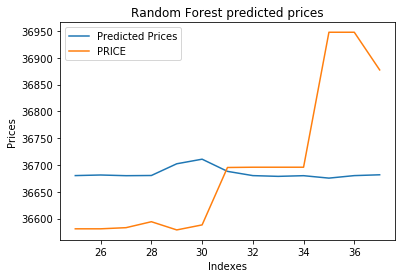

In [84]:
#Plotting the graph for the Predicted_price VS Actual Price
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

#### LINEAR REGRESSION

In [70]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression()

In [41]:
reg.predict(numpy_df_test)

array([[36698.04137843],
       [36697.15059133],
       [36702.53493294],
       [36697.50362733],
       [36697.20813633],
       [36699.9900892 ],
       [36695.29375814],
       [36707.25353369],
       [36697.84791669],
       [36701.27364592],
       [36693.31921885],
       [36702.17709272],
       [36695.93675195]])

NOTE: With the very small dataset and fetching hundreds of tweets could only make data for just less than a week. Also the prediction is not very great in such small dataset.

#### CONCLUSION: Model did not yield much confidence to justify usage to correlate stock movement with Twitter Sentiments given the limited data.


### **Pending Accuracy Scores**